Simulations based on "The hippocampus as a predictive map"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
cmap = 'jet' # lol

In [2]:
def make_rect(shape=(10, 10)):
    xlim, ylim = shape
    coordinate_to_state_arr = np.arange(xlim*ylim).reshape((xlim, ylim))
    coordinates = [
        (x, y)
        for x in range(xlim)
        for y in range(ylim)
    ]
    coordinate_to_state = {c: coordinate_to_state_arr[c] for c in coordinates}
    T = np.full((len(coordinates), len(coordinates)), False)
    A = np.zeros((len(coordinates), len(coordinates)))
    for c in coordinates:
        s = coordinate_to_state[c]
        x, y = c
        for dx, dy in [
            (-1, 0),
            (+1, 0),
            (0, -1),
            (0, +1),
        ]:
            neighbor = x+dx,y+dy
            if neighbor in coordinate_to_state:
                T[s, coordinate_to_state[neighbor]] = True
        A[s, :] = T[s, :] / np.sum(T[s, :])
    return T, A

def SR(A, gamma=0.9):
    return np.linalg.inv(np.eye(A.shape[0])-gamma*A)

shape = (10, 11)
T, A = make_rect(shape)
M = SR(A)
print('Sum of rows of A (should be 1s)', np.sum(A, axis=1))

Sum of rows of A (should be 1s) [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


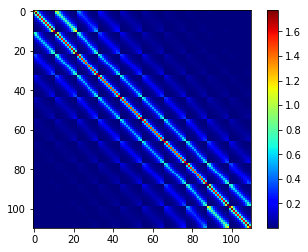

In [3]:
plt.imshow(M, cmap=cmap)
plt.colorbar()

In [4]:
evals, _evecs = np.linalg.eig(M)
evecs = np.real(_evecs)
pos_evecs = np.where(evecs<0, 0, evecs)

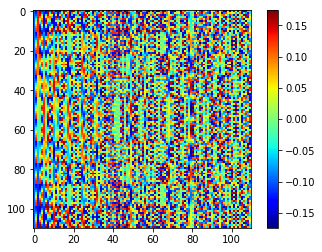

In [5]:
plt.imshow(evecs, cmap=cmap)
plt.colorbar()

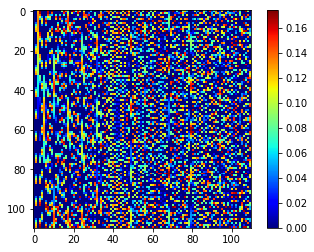

In [6]:
plt.imshow(pos_evecs, cmap=cmap)
plt.colorbar()

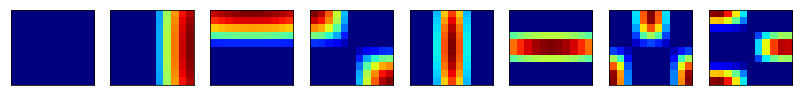

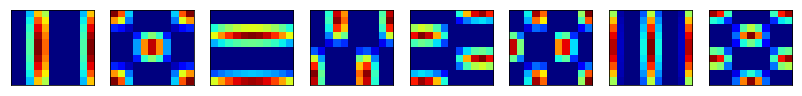

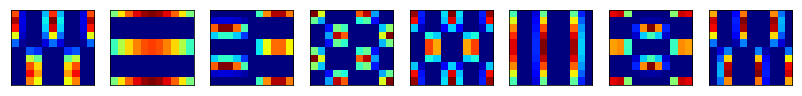

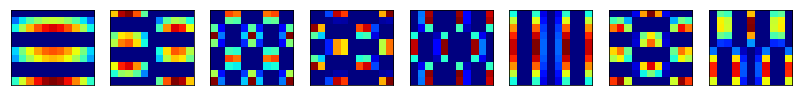

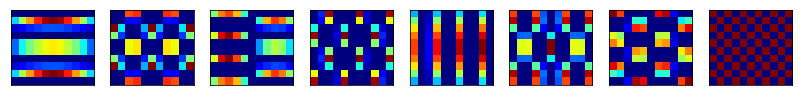

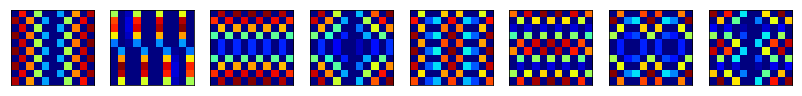

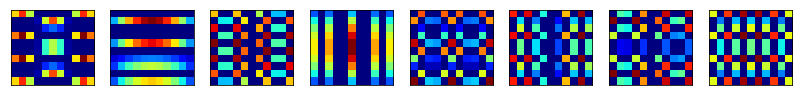

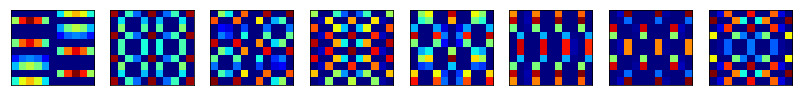

In [7]:
def _render_evecs(pos_evecs, shape):
    axes = []
    for _ in range(8):
        f, a = plt.subplots(1, 8, figsize=(14, 4))
        axes += a.flatten().tolist()

    for idx, ax in enumerate(axes):
        ax.imshow(pos_evecs[:, idx].reshape(shape), cmap=cmap)
        ax.set(xticks=[], yticks=[])

def positive_eigs(M):
    evals, _evecs = np.linalg.eig(M)
    evecs = np.real(_evecs) # HACK is this appropriate?
    pos_evecs = np.where(evecs<0, 0, evecs) # Per paper, make eigenvectors positive, since firing is always positive.
    return pos_evecs

_render_evecs(positive_eigs(SR(A)), shape)

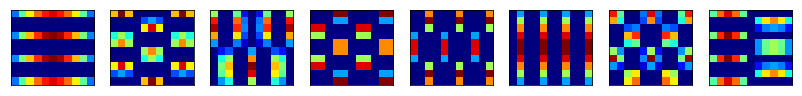

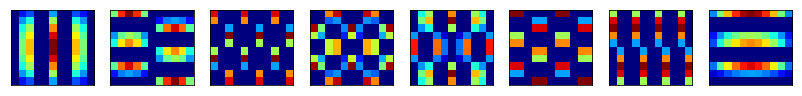

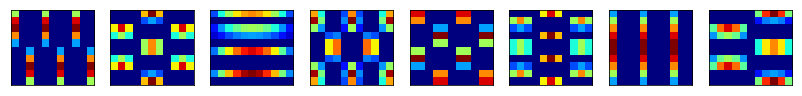

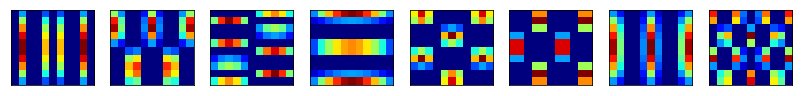

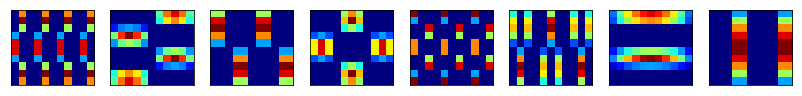

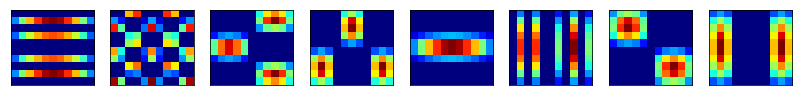

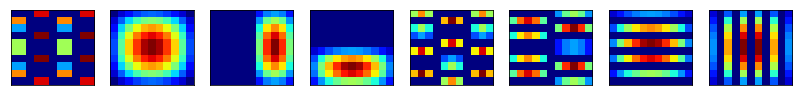

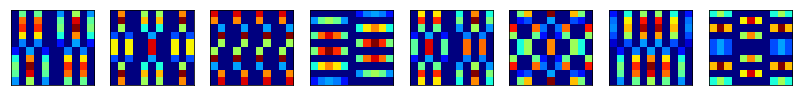

In [8]:
# Not sure these are at all interpretable, but the pictures look cool!
_render_evecs(positive_eigs(SR(T)), shape)

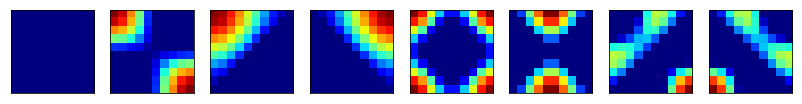

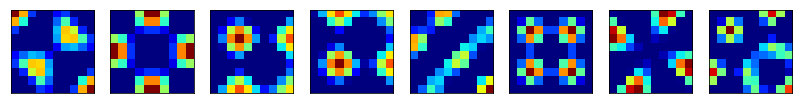

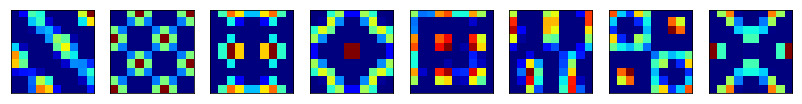

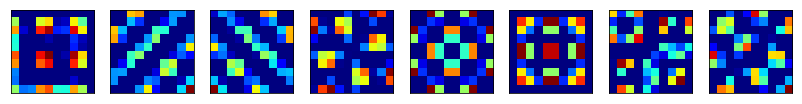

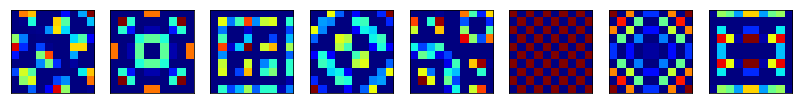

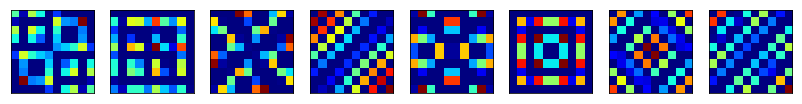

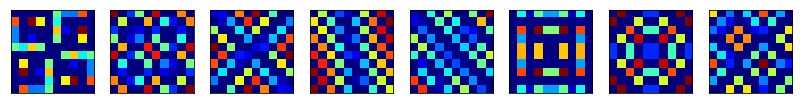

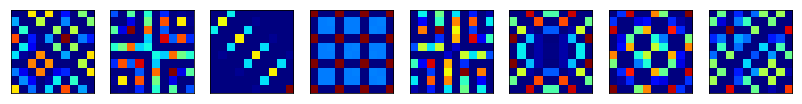

In [9]:
# Now squares...
shape = (10, 10)
T, A = make_rect(shape)
_render_evecs(positive_eigs(SR(A)), shape)

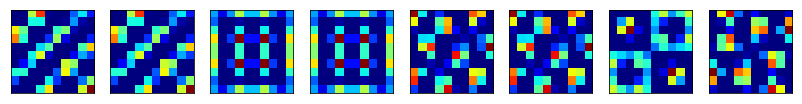

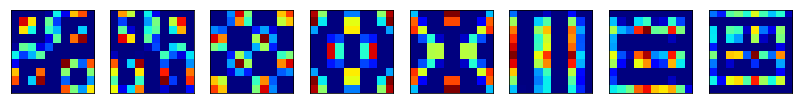

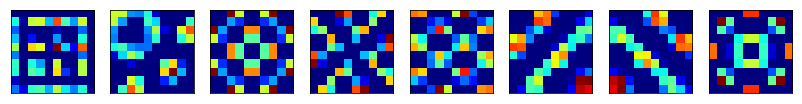

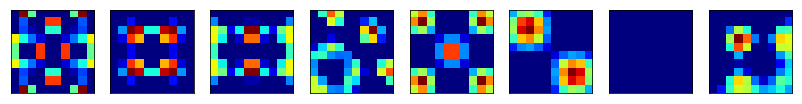

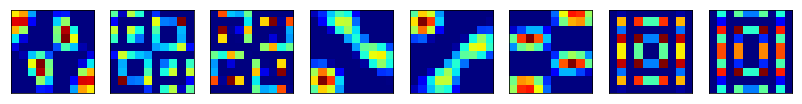

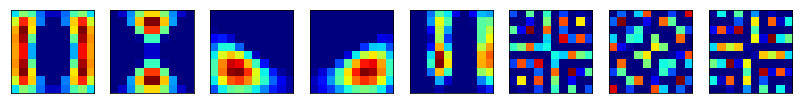

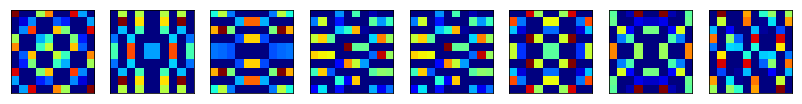

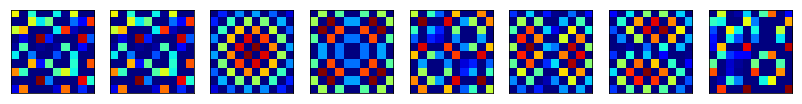

In [10]:
_render_evecs(positive_eigs(SR(T)), shape)

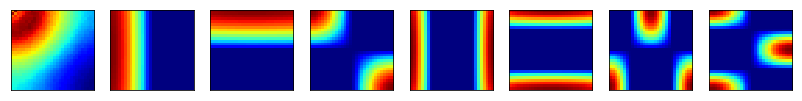

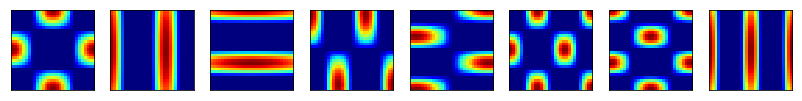

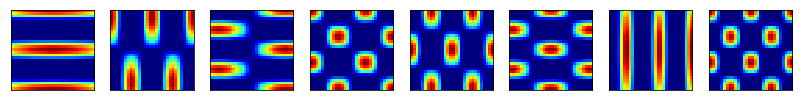

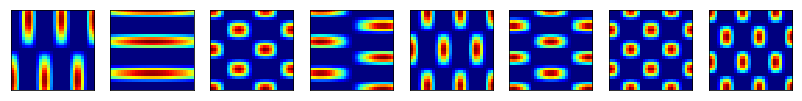

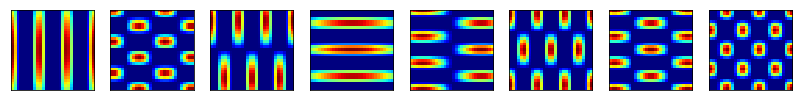

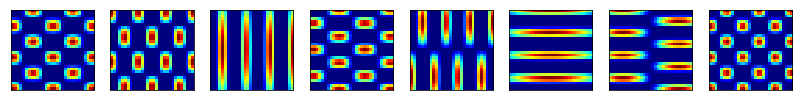

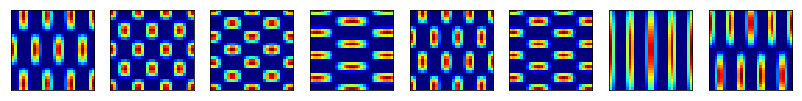

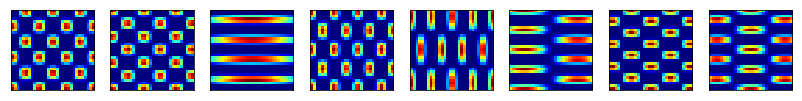

In [11]:
# Now a larger grid, as in the paper
shape=(29, 30)
T, A = make_rect(shape)
_render_evecs(positive_eigs(SR(A)), shape)

# Multi-compartment result

In [12]:
def multi_comp_2():
    shape = (30, 29)
    h, w = shape
    T, _ = make_rect(shape)

    # Make left wall
    row = 18
    for idx in range(15):
        if idx == 15//2:
            continue
        T[row*w+idx, (row+1)*w+idx] = 0
        T[(row+1)*w+idx, row*w+idx] = 0

    # Make right wall
    row = 9
    for idx in range(15, w):
        if idx == 15+15//2:
            continue
        T[row*w+idx, (row+1)*w+idx] = 0
        T[(row+1)*w+idx, row*w+idx] = 0

    # Make the big middle wall
    col = 15
    for r in range(h):
        if r in (4, 24):
            continue
        T[r*w+col, r*w+col+1] = 0
        T[r*w+col+1, r*w+col] = 0

    A = T/np.sum(T, axis=1)
    return T, A, shape
T, A, shape = multi_comp_2()

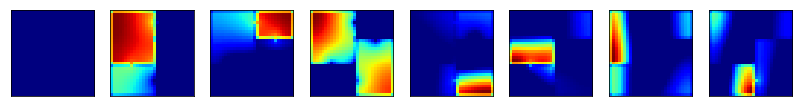

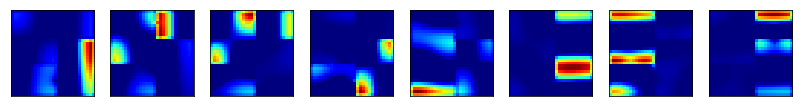

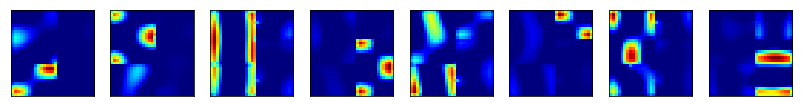

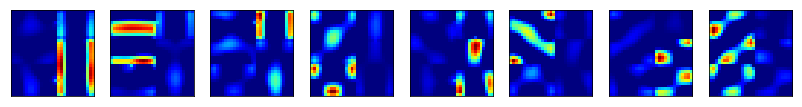

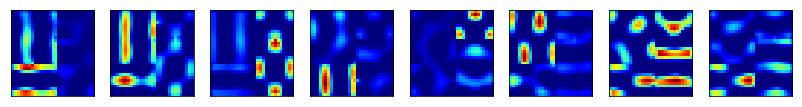

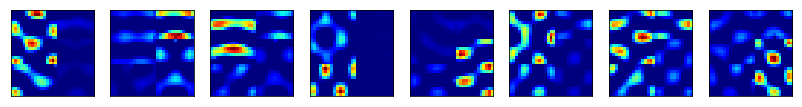

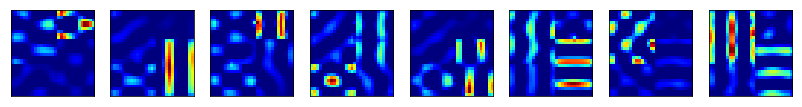

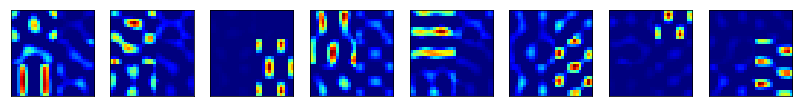

In [13]:
_render_evecs(positive_eigs(SR(A)), shape)